# $$TME04 : SVM$$

# Test des fonctions

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import arftools as ar
from sklearn import svm,multiclass, model_selection
import sklearn

In [2]:
# load data
def load_usps ( filename ) :
    with open ( filename, "r" ) as f :
        f.readline()
        data =[[float(x) for x in l.split() ] for l in f if len (l.split()) > 2]
    tmp = np.array(data)
    return tmp[:,1:] , tmp[:,0].astype(int)
datax , datay = load_usps ( "USPS_train.txt" )
#visualize data
def show_usps ( data ) :
    plt.imshow ( data.reshape( ( 16 , 16 ) ), interpolation="nearest" , cmap="gray" )
    plt.colorbar ( )


In [3]:
datax[0]

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.369, 1.862,
       0.833, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.008, 1.297, 2.   , 1.307, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.59 , 2.   , 1.986, 0.435, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.317,
       1.825, 2.   , 1.562, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.062, 1.54 , 2.   , 1.778,
       0.285, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 1.1  , 2.   , 1.922, 0.561, 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.743, 1.95 , 2.   , 0.838, 0.   , 0.   , 0.   , 0.013, 0.286,
       0.168, 0.   , 0.   , 0.   , 0.   , 0.   , 0.203, 1.909, 2.   ,
       1.3  , 0.039, 0.   , 0.   , 0.45 , 1.485, 1.996, 1.867, 1.092,
       0.   , 0.   ,

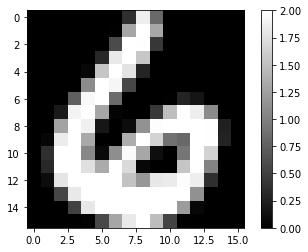

In [4]:
show_usps(datax[0])

In [5]:
datay[0]

6

datax est une liste de matrice 16 x 16 et chaque case du matrice représente un pixel. ( la matrice représente les pixels d'un chiffre)

In [6]:
# Données artificielles 2D 
X, y= ar.gen_arti(centerx=1,centery=1,sigma=0.1,nbex=1000,data_type=0,epsilon=0.02)

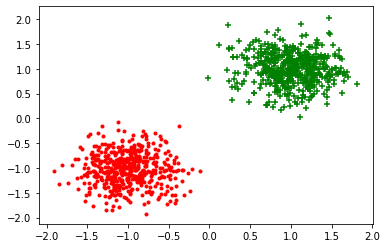

In [7]:
ar.plot_data(X,y)

In [10]:

clf = sklearn.svm.SVC(probability=True)
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

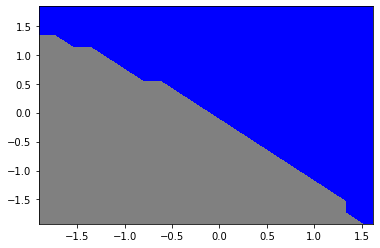

In [14]:
ar.plot_frontiere(X,clf.predict,step=20)

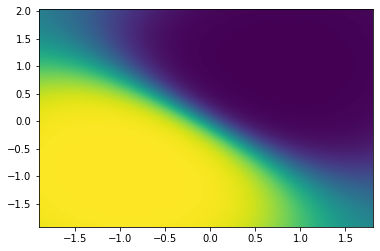

In [15]:
def plot_frontiere_proba( data , f , step=20):
    grid , x , y=ar.make_grid( data=data , step=step )
    plt.contourf(x , y , f(grid).reshape(x.shape),255)
plot_frontiere_proba(X,lambda x : clf.predict_proba( x )[ : , 0 ],step =50)

# Introduction ( comparaison entre les modèles dèjà implémentés et les modèles de skleanrn )

* Ici il ne faut les modèles de liticia et hanane

# Linéaire pénalisé - régularisation de Tikhonov

* il nous faut toujours leurs code

# SVM et Grid Search

In [16]:
def SVM( C=10, kernel='linear',  max_iter=100,data_USPS=False,data_type=0, epsilon=0.3,probability=True):  # idk si j'ai pris tt les parametres possible 
    """ 
    :param data_type: 0: melange 2 gaussiennes, 1: melange 4 gaussiennes, 2:echequier
    :param epsilon: bruit dans les donnees
    :param C: penality
    :param kernel: kernel utilisé
    :param probability: Booléen permettant l'utilisation de la frontière ou nn.
    :param max_iter: Maximum d'itérations
    :param data_USPS: Booléen permettant l'utilisation des données USPS ou bien les données artificielles
    """
    if(not data_USPS):
        trainx, trainy = ar.gen_arti(nbex=1000, data_type=data_type, epsilon=epsilon)
        testx, testy = ar.gen_arti(nbex=1000, data_type=data_type, epsilon=epsilon)
    else:
        trainx , trainy = load_usps ( "USPS_train.txt" )
        testx , testy = load_usps ( "USPS_train.txt" )

    s = sklearn.svm.SVC(C=C, kernel=kernel, probability=probability, max_iter=max_iter)

    s.fit(trainx, trainy)

    err_train = 1 - s.score(trainx, trainy)
    err_test = 1 - s.score(testx, testy)

    print("Erreur : train %f, test %f\n" % (err_train, err_test))
    if (not data_USPS):
        if probability:
            def f(x): return s.predict_proba(x)[:, 0]
        else:
            def f(x): return s.decision_function(x)

        plot_frontiere_proba(testx,lambda x : clf.predict_proba( x )[ : , 0 ],step =50)
        ar.plot_data(testx,testy)
        plt.title("using the kernel: "+kernel)

Erreur : train 0.000000, test 0.000000



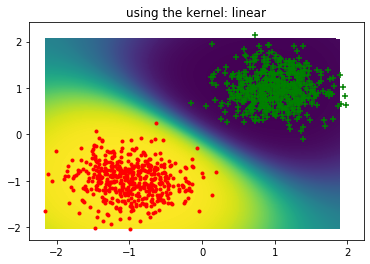

In [17]:
SVM(data_type=0, epsilon=0.2)

In [18]:
def svm_gridSearch(trainx, trainy,kernel):
    """ Finding the best parameters for this data and for this kernel
    :param trainx: Contains examples of the learning base
    :param trainy: Learning Base Labels
    :param kernel: the kernel of SVM

    """

    grid = {'C': [1, 5, 10, 15, 20, 50, 100],
            'max_iter': [50, 100, 500, 1000,4000],
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid' ],
            'gamma': [0.0001, 0.001, 0.01, 0.1],
            'degree':[1,3,5,7],
            'shrinking':[True,False]
           }

    clf = svm.SVC()
    clf = model_selection.GridSearchCV(clf, grid, n_jobs=-1,cv=5)
    clf.fit(trainx, trainy)   

    print("best_params for the kernel"+kernel+"are: ")
    print(clf.best_params_)

In [26]:
trainx, trainy = ar.gen_arti(nbex=1000, data_type=1, epsilon=0.2)
testx, testy = ar.gen_arti(nbex=1000, data_type=1, epsilon=0.3)
svm_gridSearch(trainx, trainy, testx, testy)

best_params:
{'C': 20, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 100, 'shrinking': True}


/home/sidhoum/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


# Apprentissage multi-classe 

In [19]:

def multiClass(trainx, trainy, testx, testy):

    oneVsOne = multiclass.OneVsOneClassifier(svm.LinearSVC(max_iter=16000))
    oneVsAll = multiclass.OneVsRestClassifier(svm.LinearSVC(max_iter=16000))

    oneVsOne.fit(trainx, trainy)
    oneVsOneTrainErr = 1 - oneVsOne.score(trainx, trainy)
    oneVsOneTestErr = 1 - oneVsOne.score(testx, testy)

    oneVsAll.fit(trainx, trainy)
    oneVsAllTrainErr= 1 -  oneVsAll.score(trainx, trainy)
    oneVsAllTestErr = 1 - oneVsAll.score(testx, testy)

    print("L'erreur en train pour oneVsOne :"+str(oneVsOneTrainErr)+" et pour oneVsAll :"+str(oneVsAllTrainErr))
    print("L'erreur en test de oneVsOne :"+str(oneVsOneTestErr)+" et pour oneVsAll :"+str(oneVsAllTestErr))


In [46]:
trainx , trainy = load_usps ( "USPS_train.txt" )
testx , testy = load_usps ( "USPS_train.txt" )
multiClass(trainx, trainy, testx, testy)

L'erreur en train pour oneVsOne :0.00013715539706482538 et pour oneVsAll :0.011109587162254853
L'erreur en test de oneVsOne :0.00013715539706482538 et pour oneVsAll :0.011109587162254853


# String Kernel

In [ ]:
def stringKernel(s,t):
    pass

def stringKernelClassifier(trainx,trainy,testx,testy):
    clf = SVC(kernel=string_kernel)
    clf.fit(trainx,testx)
    errTrain = 1 - clf.score(trainx,trainy)
    errTest = 1 - clf.score(testx,testy)
    print("l'erreur en train est: "+str(errTrain)+" en test:"+str(errTest))
    